### Implement Self Organizing Map for anomaly Detection
- Use Credit Card Applications Dataset:
- Detect fraud customers in the dataset using SOM and perform hyperparameter tuning
- Show map and use markers to distinguish frauds

In [1]:
data = r'Data\Credit_Card_Applications.csv'

In [2]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv(data)

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (690, 16)

First few rows:


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = df.drop(columns=df.columns[-1]).values
y = df.iloc[:, -1].values

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [5]:
som_grid_size = 10
som_sigma = 1.0
som_learning_rate = 0.5
som_iterations = 10000
som = MiniSom(x=som_grid_size, y=som_grid_size, 
              input_len=X_scaled.shape[1],
              sigma=som_sigma, 
              learning_rate=som_learning_rate,
              random_seed=42)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, som_iterations)

In [6]:
distance_map = som.distance_map()
fraud_markers = []
normal_markers = []

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    if y[i] == 0:  # Assuming 0 is rejected/fraud
        fraud_markers.append(w)
    else:
        normal_markers.append(w)

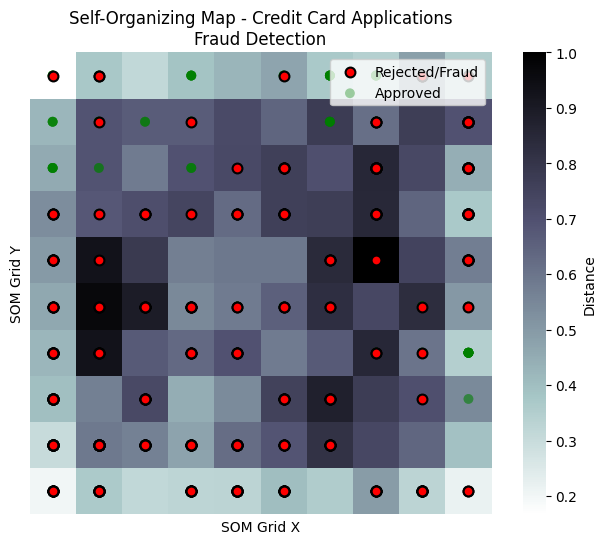


SOM trained with grid size: 10x10
Sigma: 1.0, Learning rate: 0.5
Number of iterations: 10000


In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(distance_map.T, cmap='bone_r', cbar_kws={'label': 'Distance'},
            square=True, xticklabels=False, yticklabels=False)

fraud_arr = np.asarray(fraud_markers)
normal_arr = np.asarray(normal_markers)

if fraud_arr.size:
    plt.scatter(fraud_arr[:, 0] + 0.5, fraud_arr[:, 1] + 0.5,
                s=50, c='red', edgecolors='k', linewidths=1.5,
                label='Rejected/Fraud', zorder=3)

if normal_arr.size:
    plt.scatter(normal_arr[:, 0] + 0.5, normal_arr[:, 1] + 0.5,
                s=50, c='green', alpha=0.35, edgecolors='none',
                label='Approved', zorder=2)

plt.legend(loc='upper right')
plt.title('Self-Organizing Map - Credit Card Applications\nFraud Detection')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')
plt.show()

print(f"\nSOM trained with grid size: {som_grid_size}x{som_grid_size}")
print(f"Sigma: {som_sigma}, Learning rate: {som_learning_rate}")
print(f"Number of iterations: {som_iterations}")